# 3 — Sampling the Imaginary

## 3.1 Vampire Blood-Test Problem

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Pr_positive_vampire = .95
Pr_positive_mortal = .01
Pr_vampire = .001

# Pr_positive is just the average positive value
Pr_positive = (Pr_positive_vampire * Pr_vampire) + (Pr_positive_mortal * (1 - Pr_vampire))

Pr_vampire_positive = round((Pr_positive_vampire * Pr_vampire) / Pr_positive, 3)
print(Pr_vampire_positive)

0.087


In [3]:
# 3.1 Sampling from a grid-approximate posterior
p_grid = np.linspace(0, 1, 1000)
prob_p = np.ones(1000)
prob_data = stats.binom.pmf(k=6, n=9, p=p_grid)
posterior = prob_data * prob_p # "Remember, the posterior here means the probability of p conditional on the data."
posterior /= posterior.sum() # Normalize the posterior

"Now we wish to draw 10,000 samples from this posterior. Imagine the posterior is a bucket
full of parameter values, numbers such as 0.1, 0.7, 0.5, 1, etc. Within the bucket, each value
exists in proportion to its posterior probability, such that values near the peak are much more
common than those in the tails. We’re going to scoop out 10,000 values from the bucket.
Provided the bucket is well mixed, the resulting samples will have the same proportions as
the exact posterior density. Therefore the individual values of p will appear in our samples
in proportion to the posterior plausibility of each value." (p. 52)

In [ ]:
# "The workhorse here is [np.random.choice], which randomly pulls values from a vector [numpy array]. The vector in
# this case is p_grid, the grid of parameter values. The probability of each value is given by
# posterior, which you computed just above."
samples = np.random.choice(p_grid, size=10000, p=posterior, replace=True)

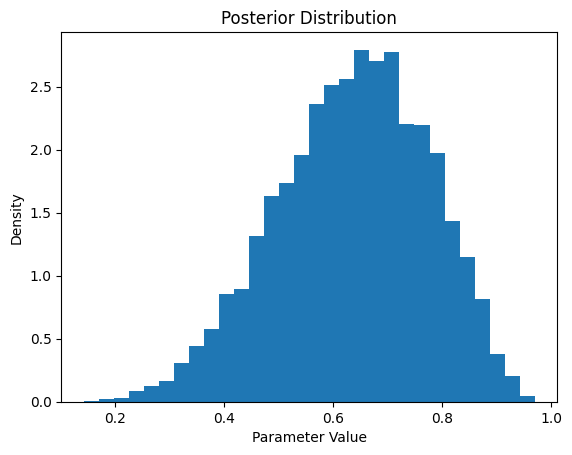

In [ ]:
# Code 3.4
plt.hist(samples, bins=30, density=True)
plt.xlabel('Parameter Value')
plt.ylabel('Density')
plt.title('Posterior Distribution')
plt.show()

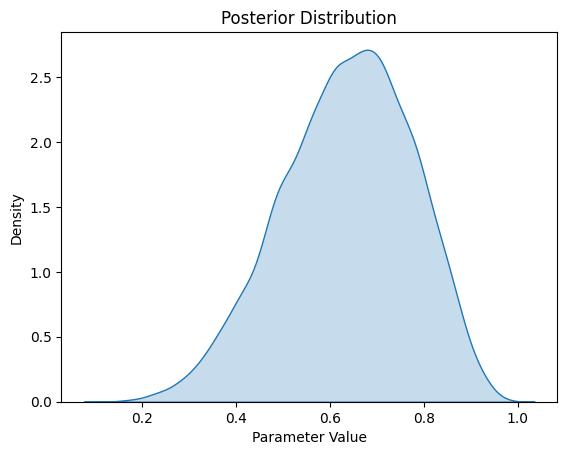

In [ ]:
# Code 3.5
sns.kdeplot(samples, fill=True)
plt.xlabel('Parameter Value')
plt.ylabel('Density')
plt.title('Posterior Distribution')
plt.show()

## 3.2 Sampling to Summarize

In [12]:
# Code 3.6
np.sum(posterior[p_grid < 0.5])

0.1718745890202287

In [13]:
# Code 3.7
np.sum((samples < 0.5) / len(samples))

0.17560000000000003